# Support Vector Machines

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

How does SVM work?

The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset.

Dealing with non-linear and inseparable planes

Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side).

In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). Now you can easily segregate these points using linear separation.

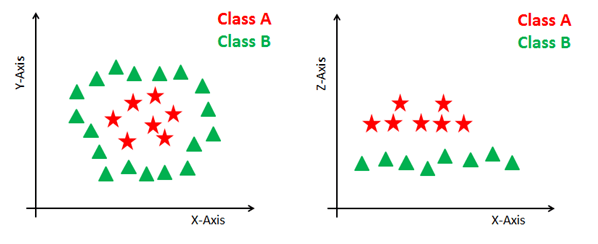,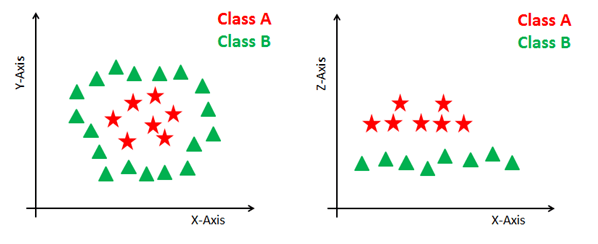

SVM Kernels

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

    Linear Kernel A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
    
    K(x, xi) = sum(x * xi)
    
Polynomial Kernel A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
    K(x,xi) = 1 + sum(x * xi)^d
    
 Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

    Radial Basis Function Kernel The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

K(x,xi) = exp(-gamma * sum((x – xi^2))

Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

              Tuning Hyperparameters

    Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

    Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.


Advantages
SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.


Disadvantages
SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

In [7]:
#using Banknote authentication datasets
#steps
# 1. importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
#collection of data / importing data
bankdata=pd.read_csv("bill_authentication.csv")

In [9]:
#Exploratory data analysis

In [10]:
bankdata.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [11]:
bankdata.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [12]:
bankdata.shape

(1372, 5)

In [13]:
#Data processinng
#Data preprocessing involves (1) Dividing the data into attributes and labels
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']


In [14]:
#(2) dividing the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [15]:
#Train the algorithm
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
print(X_test)

      Variance  Skewness   Curtosis   Entropy
744    4.98520   8.35160  -2.542500 -1.282300
1231  -0.77848   3.40190  -3.485900 -3.556900
520    3.18960   5.75260  -0.185370 -0.300870
739    1.82160  -6.47480   8.051400 -0.418550
743    4.79260   1.70710  -0.051701  1.492600
1033   1.50770   1.95960  -3.058400 -0.122430
1282  -1.99830  -6.60720   4.825400 -0.419840
103    3.33970  -4.61450   3.982300 -0.237510
1103  -5.63700   8.12610   0.130810 -5.014200
922   -1.41740  -2.25350   1.518000  0.619810
7      2.09220  -6.81000   8.463600 -0.602160
267    3.84960   9.79390  -4.150800 -4.458200
465   -2.69890  12.19840   0.676610 -8.548200
1293  -3.96980   3.68120  -0.600080 -4.013300
664    5.35860   3.75570  -1.734500  1.078900
451    5.68100   7.79500  -2.684800 -0.925440
151   -1.75990  11.92110   2.675600 -3.324100
660    4.27560  -2.65280   2.137500  0.944370
777   -1.82150   2.75210  -0.722610 -2.353000
368    3.49850   3.16390   0.226770 -0.165100
584    0.33565   6.83690   0.69718

In [38]:
#making prediction
y_pred = svclassifier.predict(X_test)

In [39]:
#model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[153   4]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.97      0.99      0.98       118

   micro avg       0.98      0.98      0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [42]:
def seeoutput(Variance,Skewness,Curtosis,Entropy):
    if(svclassifier.predict([[Variance,Skewness,Curtosis,Entropy]])) == 0:
        print("0...")
    else:
        print("is class 1")

In [43]:
seeoutput(3.62160,8.6661,-2.8,-0.44699)

0...


In [20]:
#using gausian kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/home/tony/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred = svclassifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[157   0]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [23]:
#sigmoid Kernel

In [24]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

/home/tony/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
#prediction and evaluations
y_pred = svclassifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108  49]
 [ 61  57]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       157
           1       0.54      0.48      0.51       118

   micro avg       0.60      0.60      0.60       275
   macro avg       0.59      0.59      0.59       275
weighted avg       0.60      0.60      0.60       275



#polynomial kernel
In the case of polynomial kernel, you also have to pass a value for the degree parameter of the SVC class. This basically is the degree of the polynomial. Take a look at how we can use a polynomial kernel to implement kernel SVM:

In [44]:
#model training
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

/home/tony/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
#Make predictions
y_pred = svclassifier.predict(X_test)

In [48]:
print(X_test)

      Variance  Skewness   Curtosis   Entropy
744    4.98520   8.35160  -2.542500 -1.282300
1231  -0.77848   3.40190  -3.485900 -3.556900
520    3.18960   5.75260  -0.185370 -0.300870
739    1.82160  -6.47480   8.051400 -0.418550
743    4.79260   1.70710  -0.051701  1.492600
1033   1.50770   1.95960  -3.058400 -0.122430
1282  -1.99830  -6.60720   4.825400 -0.419840
103    3.33970  -4.61450   3.982300 -0.237510
1103  -5.63700   8.12610   0.130810 -5.014200
922   -1.41740  -2.25350   1.518000  0.619810
7      2.09220  -6.81000   8.463600 -0.602160
267    3.84960   9.79390  -4.150800 -4.458200
465   -2.69890  12.19840   0.676610 -8.548200
1293  -3.96980   3.68120  -0.600080 -4.013300
664    5.35860   3.75570  -1.734500  1.078900
451    5.68100   7.79500  -2.684800 -0.925440
151   -1.75990  11.92110   2.675600 -3.324100
660    4.27560  -2.65280   2.137500  0.944370
777   -1.82150   2.75210  -0.722610 -2.353000
368    3.49850   3.16390   0.226770 -0.165100
584    0.33565   6.83690   0.69718

In [47]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, log_loss
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153   4]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.97      0.99      0.98       118

   micro avg       0.98      0.98      0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [34]:
print("LogLoss",log_loss(y_pred,y_test))

LogLoss 0.6279806602617594


Comparison of Kernel Performance

If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.

Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.

Resources

Want to learn more about SVMs, Scikit-Learn, and other useful machine learning algorithms? I'd recommend checking out some more detailed resources, like one of these books:

    Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond
    Python Data Science Handbook: Essential Tools for Working with Data
    Data Science from Scratch: First Principles with Python


In [ ]:
#time to kaggle.com